# Pycaret

In [2]:
import pandas as pd
train_df = pd.read_csv("../../data/02/30-30/30-30_train_df.csv", index_col=0)
val_df = pd.read_csv("../../data/02/30-30/30-30_val_df.csv", index_col=0)
test_df = pd.read_csv("../../data/02/30-30/30-30_test_df.csv", index_col=0)


train_df = pd.concat([train_df, val_df])
train_df = train_df.drop(["filename"], axis=1)
test_df = test_df.drop(["filename"], axis=1)

In [3]:
import pycaret.classification as cl

clf = cl.setup(
    data=train_df, 
    target='genre', 
    test_data=test_df,
    data_split_stratify=True,
    fold_strategy="stratifiedkfold", 
    fold=10, 
    feature_selection=True,
    feature_selection_threshold=0.15,
    feature_selection_method="boruta",
    use_gpu=True,
    train_size=.9, 
    normalize=True,
)


,Description,Value
0,session_id,6373
1,Target,genre
2,Target Type,Multiclass
3,Label Encoded,"blues: 0, classical: 1, country: 2, disco: 3, hiphop: 4, jazz: 5, metal: 6, pop: 7, reggae: 8, rock: 9"
4,Original Data,"(893, 117)"
5,Missing Values,False
6,Numeric Features,116
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
lgbm = cl.create_model("lightgbm", n_estimators=500)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.9742,0.8333,0.8397,0.8223,0.8148,0.8178
1,0.8000,0.9759,0.8000,0.8078,0.7991,0.7778,0.7787
2,0.7556,0.9599,0.7556,0.7583,0.7556,0.7284,0.7287
3,0.7079,0.9663,0.7083,0.7066,0.7011,0.6754,0.6766
4,0.7978,0.9683,0.7986,0.8002,0.7929,0.7753,0.7765
5,0.8427,0.9875,0.8444,0.8846,0.8504,0.8252,0.8294
6,0.7528,0.9580,0.7542,0.7627,0.7556,0.7253,0.7258
7,0.8315,0.9708,0.8333,0.8437,0.8322,0.8127,0.8138
8,0.7978,0.9740,0.7972,0.8098,0.7999,0.7753,0.7761
9,0.7191,0.9572,0.7181,0.7314,0.7172,0.6879,0.6893


In [5]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
custom_grid = {
    'num_leaves': sp_randint(6, 50),
    'min_child_samples': sp_randint(10, 50),
    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'subsample': sp_uniform(loc=0.2, scale=0.8),
    'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
}


In [6]:
tuned = cl.tune_model(
    lgbm,
    n_iter=100,
    optimize="AUC",
    custom_grid=custom_grid
)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8111,0.9759,0.8111,0.8205,0.8077,0.7901,0.7919
1,0.8000,0.9763,0.8000,0.8106,0.7968,0.7778,0.7797
2,0.7667,0.9635,0.7667,0.7612,0.7615,0.7407,0.7412
3,0.7865,0.9680,0.7875,0.7959,0.7848,0.7628,0.7641
4,0.7978,0.9664,0.7986,0.8001,0.7954,0.7753,0.7760
5,0.8539,0.9839,0.8556,0.8751,0.8563,0.8377,0.8401
6,0.7416,0.9584,0.7431,0.7428,0.7374,0.7128,0.7139
7,0.8202,0.9767,0.8194,0.8295,0.8226,0.8002,0.8008
8,0.7865,0.9688,0.7861,0.7948,0.7837,0.7627,0.7647
9,0.7303,0.9623,0.7278,0.7358,0.7290,0.7003,0.7011


In [10]:
cl.evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

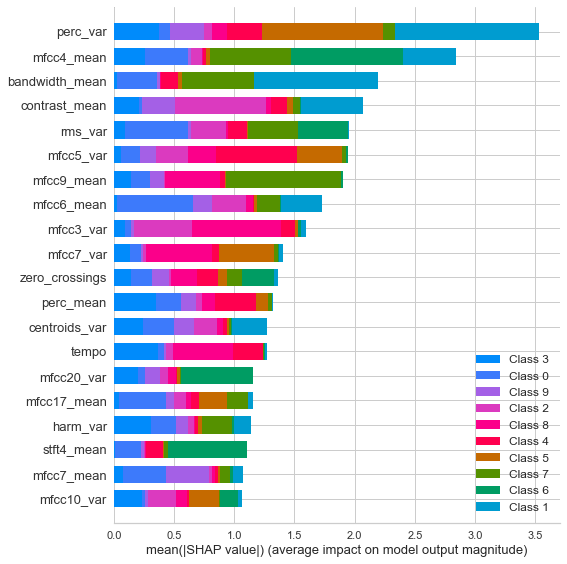

In [8]:
cl.interpret_model(tuned)

In [ ]:
_ = cl.save_model(tuned, "lgbm")
